# Исследование устойчивости разностных схем

Дана дифференциальная задача для уравнения переноса
	\begin{equation}
		\begin{dcases}
			\dfrac{\partial u}{\partial t} + a \dfrac{\partial u}{\partial x} = 0,\ 0 < x < \infty,\ t>0,\\
		u(x,0) = u_0(x),\ x \geq 0\\
        u(0,t) = \mu_0(t),\ t \geq 0
		\end{dcases}
	\end{equation}
	где
    
- $a=10$;

- $u_0(x) = x^2$;

- $\mu_0(t) = 100t^2$.

Сразу же проверим условия согласования для корректной постановки задачи:
$$u_0(0) = 0 = \mu_0(0).$$

Определим входные данные компьютерно

In [1]:
a = 10

def u_0(x):
    return x**2

def mu_0(t):
    return 100*t**2

## Построение разностной схемы, погрешность аппроксимации

Для поставленной дифференциальной задачи известно точное решение
$$u(x,t) = \begin{cases}
u_0(x-at),\ t \leq \dfrac x a,\\
\mu_0\left(t - \dfrac x a\right),\ t \geq \dfrac x a.
\end{cases}$$
Подставляя известные функции, получим точное решение задачи вида
$$u(x,t) = \begin{cases}
(x-10t)^2,\ t \leq \dfrac x {10},\\
100\left(t - \dfrac x {10}\right)^2,\ t \geq \dfrac x {10}.
\end{cases}$$
Определим компьютерно функцию, соответствующую точному решению.

In [2]:
def u(x, t):
    if a * t < x.all():
        return u_0(x - a * t)
    else:
        return mu_0(t - x / a)

Пусть задана равномерная сетка узлов
$$\omega_{h\tau} = \omega_h \times \omega_\tau,$$
где
$$\omega_h = \left\{x_k = kh,\ k = 0,1,\ldots, h>0\right\},\ \omega_\tau = \left\{t_j = j\tau,\ j=0,1,\ldots, \ \tau > 0\right\}.$$
Зададим компьютерно сетки узлов. На вход эта функция принимает правую границу для сетки узлов и число разбиений отрезка, а возвращает шаг и узлы сетки.

In [3]:
import numpy as np

def generate_grid(right_border, num_splits):
    step = right_border / num_splits
    grid = np.linspace(0, right_border, num_splits+1)
    return step, grid

По условию также задан следующий шаблон
$$\text{Ш}(x,t) = \{(x-h,t),\ (x,t),\ (x+h,t),\ (x,t-\tau),\ (x,t+\tau)\}.$$
$$
\includegraphics[scale=0.5]{images/img_1}
$$
Используя предложенный шаблон на заданной сетке узлов построим разностную схему в безиндексной форме, заменяя дифференциальные производные разностными аналогами
\begin{equation}
    \begin{cases}
        y_{\overset{\circ} t} + ay_{\overset{\circ} x} = 0,\ (x,t) \in \omega_{h\tau},\\
    y(x,0) = u_0(x),\ x \in \omega_h,\\
    y(0,t) = \mu_0(t),\ t \in \omega_\tau.
    \end{cases}
\end{equation}
Разностная схема также может быть записана в индексной форме в виде
\begin{equation}
    \begin{dcases}
        \dfrac{y_k^{j+1} - y_k^{j-1}}{2\tau} + a \dfrac{y_{k+1}^j - y_{k-1}^j}{2h}=0,\  k=1,2,\ldots, j = 1,2\ldots,\\
        y_k^0 = u_0(x_k),\ k = 0, 1,\ldots,\\
        y_0^j = \mu_0(t_j),\ j = 0, 1,\ldots,\\
    \end{dcases}
\end{equation}
Нужно вычислить погрешность аппроксимации разностной схемы. Начальное и граничное условия аппроксимируются точно, так что погрешность аппроксимации разностной схемы определяется только погрешностью аппроксимации дифференциального уравнения. Поэтому для любой точки $(x,t) \in \omega_{h\tau}$ погрешность аппроксимации будет равна
$$\Psi(x,t) = u_{\overset{\circ} t} + au_{\overset{\circ} x} = \dfrac{\partial u}{\partial t} - \dfrac{\tau^2}{6}\cdot \dfrac{\partial^3 u}{\partial^3 t}  + O(\tau^4) + \dfrac{\partial u}{\partial x} - \dfrac{h^2}{6}\cdot \dfrac{\partial^3 u}{\partial^3 x}  + O(h^4) = O(h^2+\tau^2),$$ то есть данная разностная схема обладает вторым порядком аппроксимации по $x$ и вторым порядком аппроксимации по $t$.

## Исследование устойчивости разностной схемы спектральным методом

Исследование устойчивости по спектральному методу предусматривает подстановку следующего выражения в разностное уравнение
$$y_k^j = q^j e^{ik\varphi},\ \varphi \in (0, 2\pi).$$
Итак, подставляя это выражение в разностное уравнение схемы (3), получим
$$\dfrac{q^{j+1} e^{ik\varphi} - q^{j-1} e^{ik\varphi}}{2\tau} + a \dfrac{q^j e^{i(k+1)\varphi} - q^j e^{i(k-1)\varphi}}{2h}=0.$$
Сокращая общие множители, получим
$$\dfrac{q - q^{-1}}{2\tau} + a \dfrac{e^{i\varphi} - e^{-i\varphi}}{2h} = 0.$$
Таким образом, можно выразить
$$q - q^{-1} = \gamma (e^{i\varphi} - e^{-i\varphi}) = 2\gamma i \sin \varphi,\ \gamma = \dfrac {a\tau}{h}.$$
Домножим на $q$, перенесем все в одну сторону и получим
$$q^2 - 2 q \gamma i \sin \varphi - 1=0.$$
Получили квадратное уравнение относительно $q$. Найдем его корни
$$q = \dfrac{2 \gamma i \sin \varphi \pm \sqrt{-4\gamma^2 \sin^2 \varphi + 4}}{2}$$
Далее по спектральному методу для устойчивости необходимо выполнение условия $|q|^2 \leq 1$. Рассмотрим это условие
$$
    |q|^2 = 1-\gamma^2\sin^2 \varphi + (\gamma \sin\varphi)^2 = 1.
$$
Таким образом, по спектральному методу разностная схема устойчива для любого $\gamma$.

## Исследование устойчивости разностной схемы с помощью принципа максимума

Следуя принципу максимума, в качестве точки для исследования устойчивости возьмем точку $(x_i, t_{j+1})$. Таким образом, мы можем переписать аппроксимацию основного уравнения переноса
$$\dfrac{1}{\tau}y_k^{j+1} = \dfrac{1}{\tau}y_k^{j-1} - \dfrac{a}{h}y_{k+1}^j + \dfrac{a}{h}y_{k-1}^j.$$
Можем записать коэффициенты, которые требуются для проверки условий устойчивости
$$A(x) = \dfrac 1 \tau,\ B_1 = \dfrac 1 \tau,\ B_2= - \dfrac a h,\ B_3 = \dfrac a h,$$
$$D(x) = A(x) - (B_1 + B_2 + B_3) \equiv 0,\ F(x)\equiv 0.$$
Из-за того, что $$B_2= - \dfrac a h,\ B_3 = \dfrac a h,$$ а $a$ не может быть одновременно разных знаков, то одно либо $B_2$, либо $B_3$ будут отрицательны. Следовательно, по принципу максимума мы не можем утверждать, что разностная схема устойчива.

## Реализация разностной схемы

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Для реализации разностной схемы представим ее в виде
$$
    \begin{dcases}
        y_k^{j+1}= y_k^{j-1} - \gamma(y_{k+1}^j - y_{k-1}^j),\  k=1,2,\ldots, j = 1,2\ldots,\\
        y_k^0 = u_0(x_k),\ k = 0, 1,\ldots,\\
        y_0^j = \mu_0(t_j),\ j = 0, 1,\ldots,\\
    \end{dcases}\ \gamma = \dfrac{a\tau}{h}.
$$
При реализации сначала строятся значения из начального и граничного условий. То есть мы задаем $y_k^j$ при $j = 0$, $\forall k$, а затем при $k=0$, $\forall j$. Остальные значения функций можно вычислять по формуле выше.

In [5]:
def diff_scheme_solve(x, t, h, tau, u_0, mu_0, a):
    gamma = a * tau / h

    y = np.zeros((len(x), len(t)))

    for k in range(len(x)):
        y[k, 0] = u_0(x[k])

    for j in range(len(t)):
        y[0, j] = mu_0(t[j])

    for j in range(len(t)-1):
        for k in range(len(x)-1):
            y[k, j+1] = y[k, j-1] - gamma * (y[k+1, j] - y[k-1, j])

    return y

Теперь сгенерируем сетку с $\tau < h$.

In [6]:
h, x_grid = generate_grid(0.1, 5)
tau, t_grid = generate_grid(0.01, 5)

In [7]:
h

0.02

In [8]:
tau

0.002

Получим приближенное решение из разностной схемы

In [9]:
y = diff_scheme_solve(x_grid, t_grid, h, tau, u_0, mu_0, a)

Выведем двумерный график

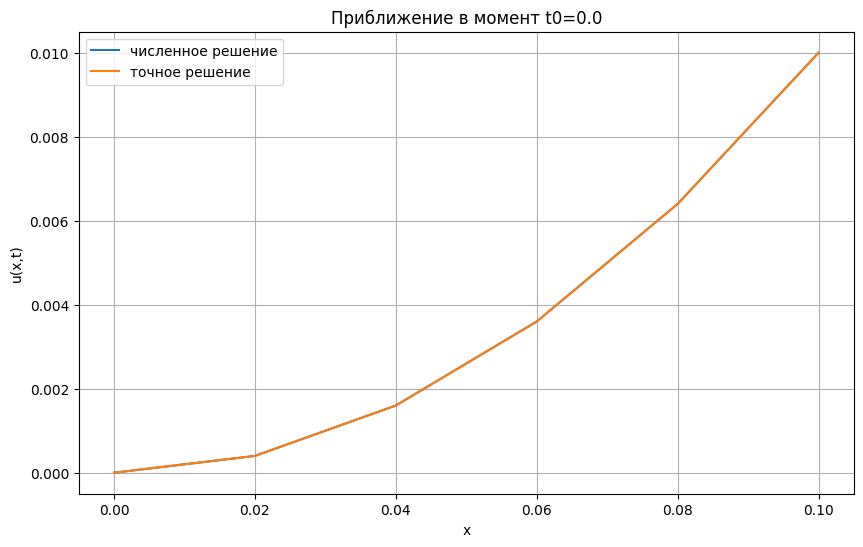

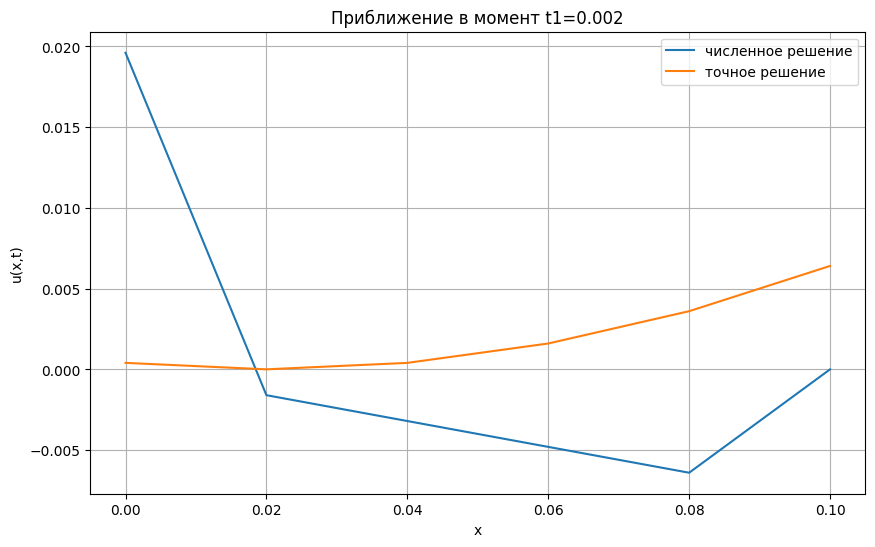

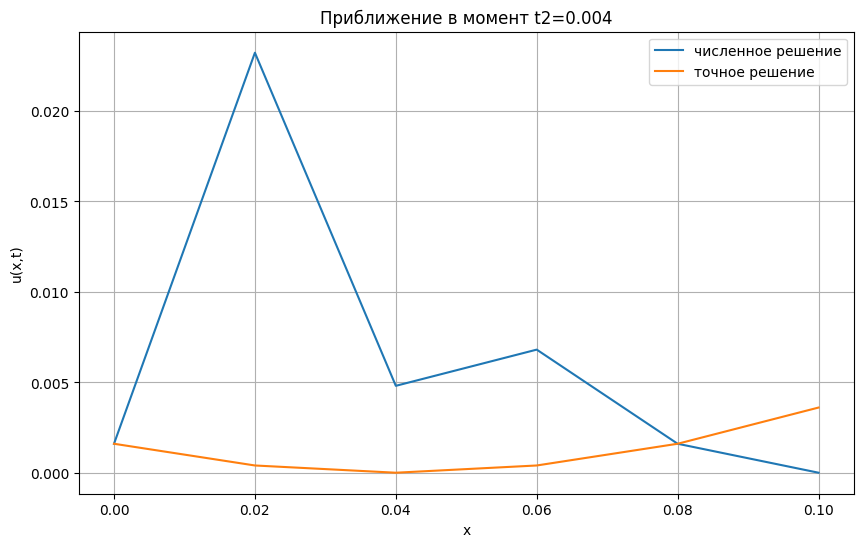

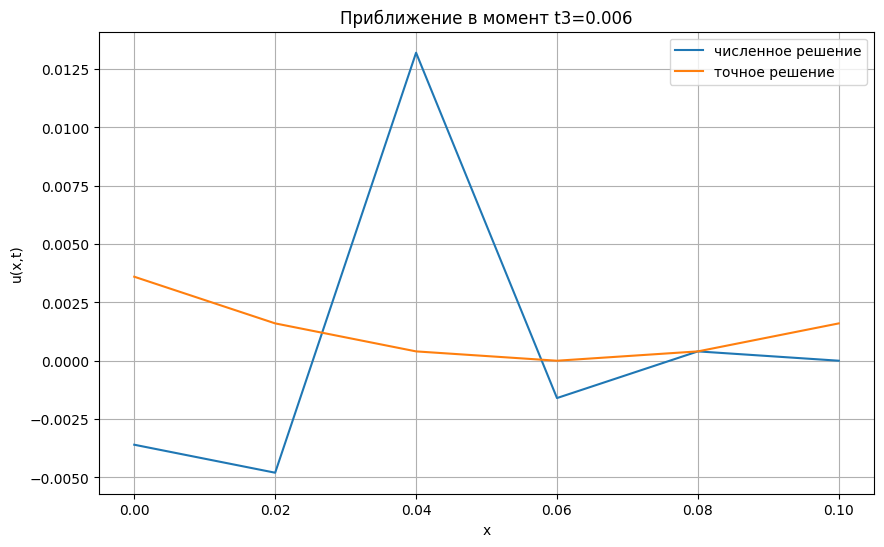

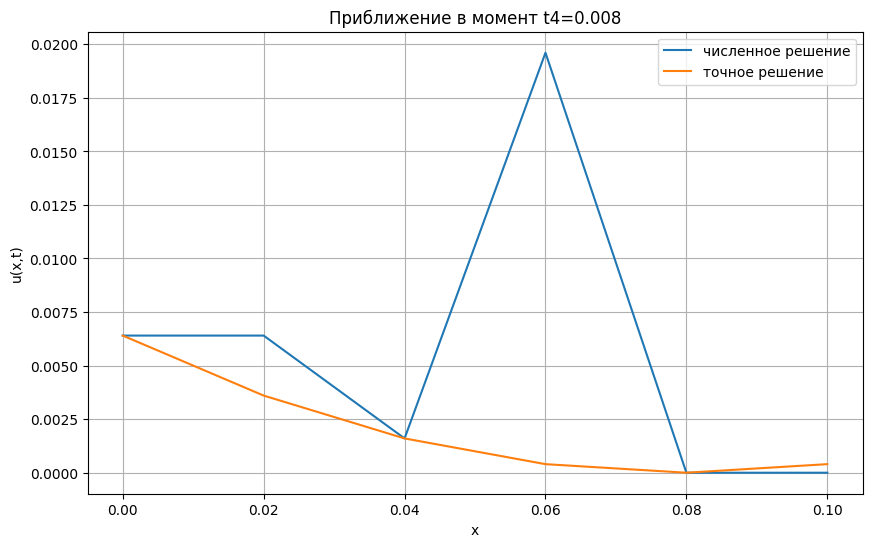

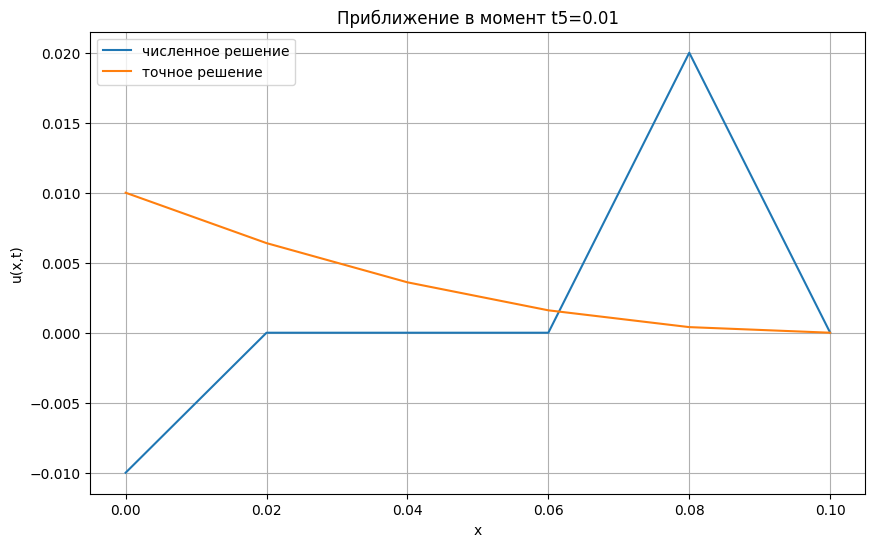

In [10]:
for j, t in enumerate(t_grid):
    plt.figure(figsize=(10, 6))
    plt.plot(x_grid[:], y[:, j], label='численное решение')
    plt.plot(x_grid, u(x_grid, t), label='точное решение')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.title('Приближение в момент t' + str(j) + '=' + str(round(t, 3)))
    plt.legend()
    plt.show()

Выведем трехмерные графики точного и приближенного решений

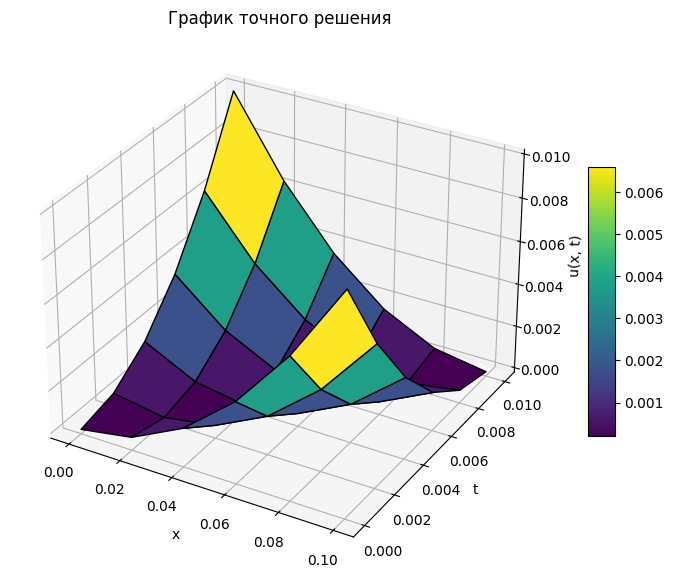

In [15]:
X, T = np.meshgrid(x_grid, t_grid)
U = np.zeros_like(X)
for i in range(T.shape[0]):
    U[i, :] = u(X[i, :], T[i, 0])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, T, U, cmap='viridis', edgecolor='k')

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x, t)')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.title('График точного решения')
plt.show()

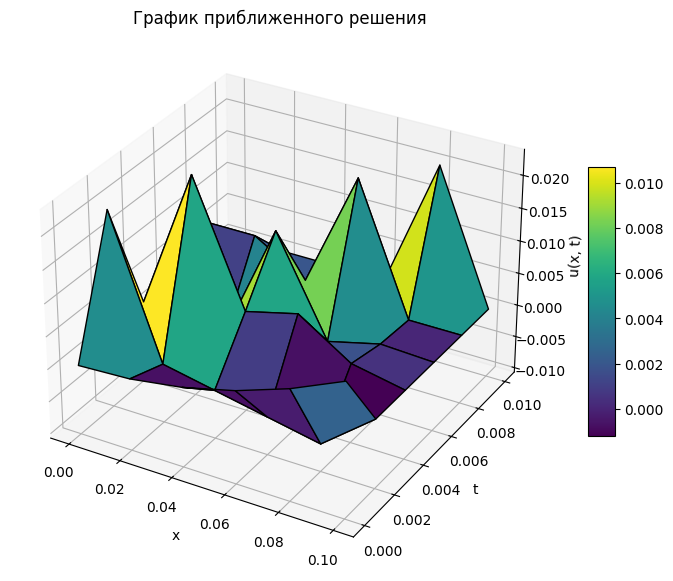

In [16]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

X, T = np.meshgrid(x_grid, t_grid)

Y = y.T

surf = ax.plot_surface(X, T, Y, cmap='viridis', edgecolor='k')

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x, t)')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.title('График приближенного решения')
plt.show()

Как можно видеть, по поведению приближенного решения мы можем утверждать, что полученная разностная схема неустойчива.

Рассмотрим теперь случай $h < \tau$.

In [18]:
h, x_grid = generate_grid(0.01, 5)
tau, t_grid = generate_grid(0.1, 5)

In [19]:
h

0.002

In [20]:
tau

0.02

In [21]:
y = diff_scheme_solve(x_grid, t_grid, h, tau, u_0, mu_0, a)

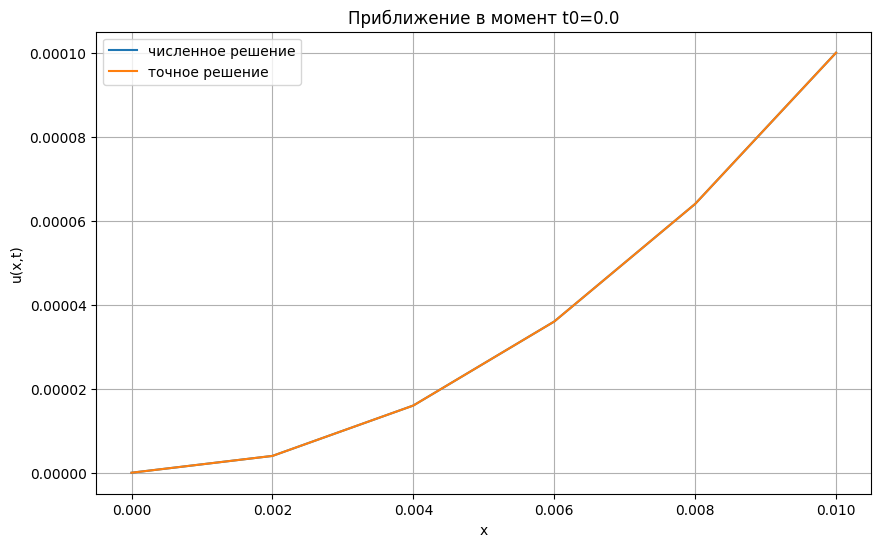

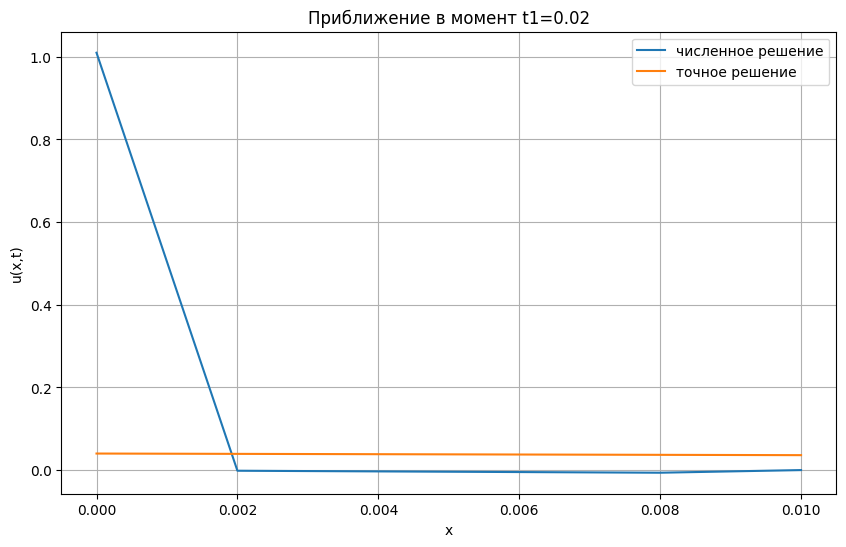

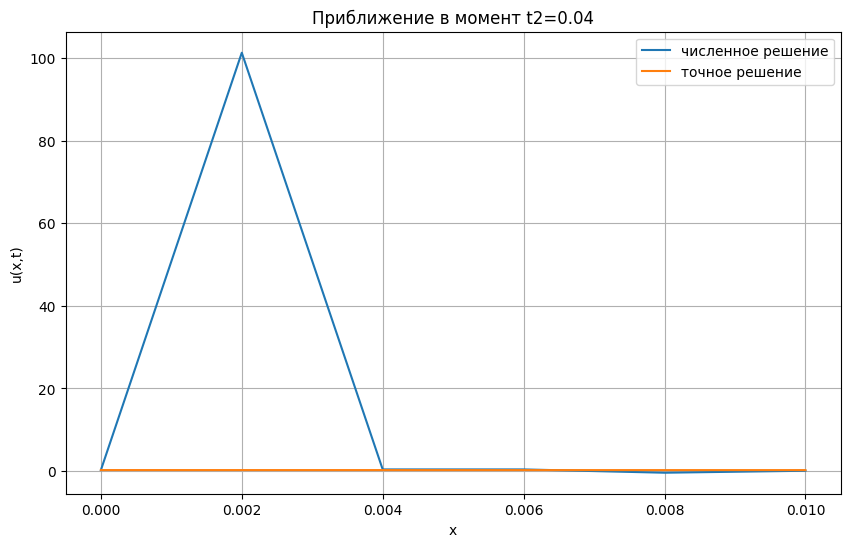

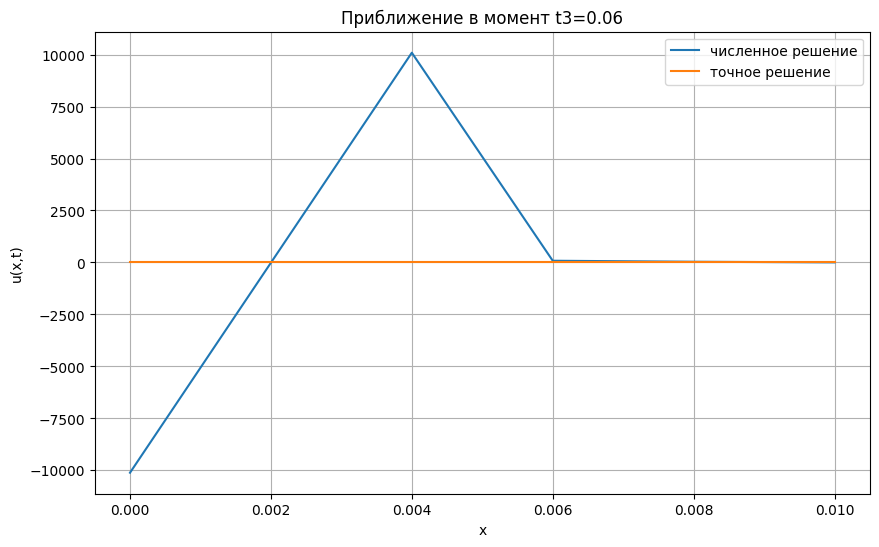

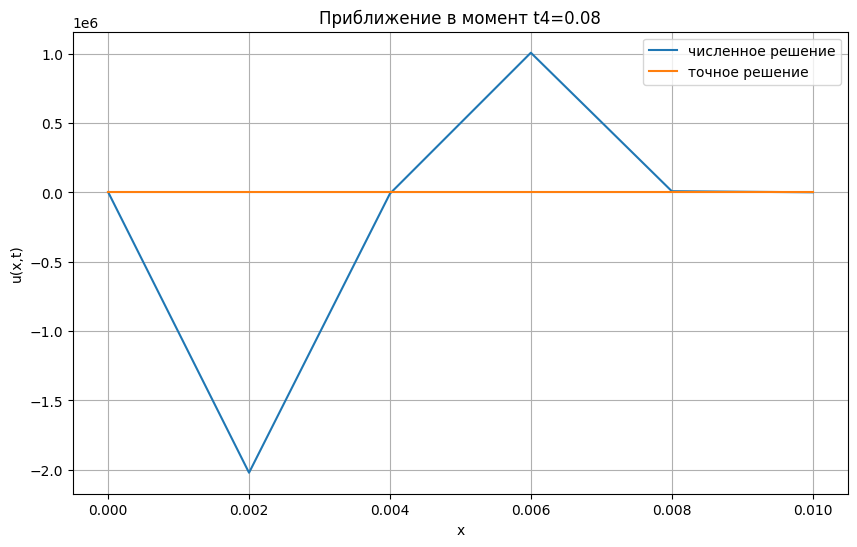

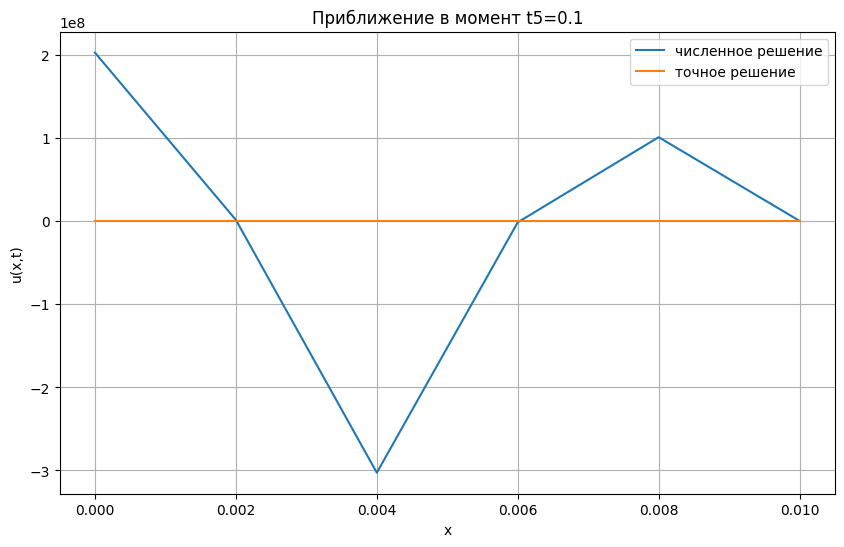

In [22]:
for j, t in enumerate(t_grid):
    plt.figure(figsize=(10, 6))
    plt.plot(x_grid[:], y[:, j], label='численное решение')
    plt.plot(x_grid, u(x_grid, t), label='точное решение')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.title('Приближение в момент t' + str(j) + '=' + str(round(t, 3)))
    plt.legend()
    plt.show()

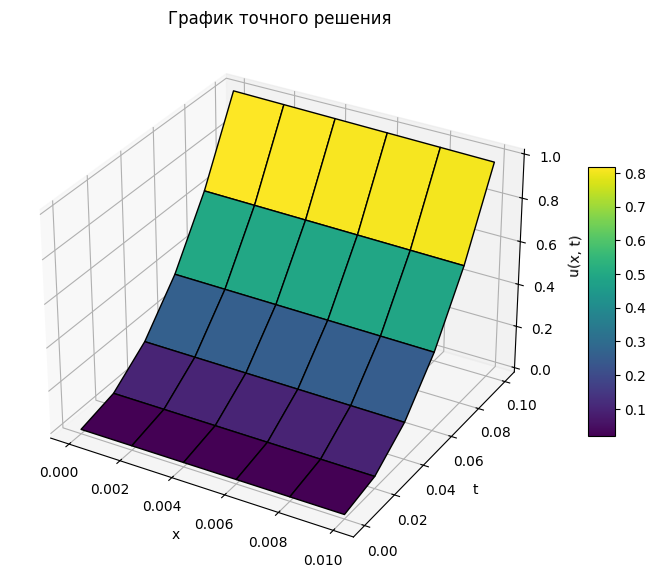

In [23]:
X, T = np.meshgrid(x_grid, t_grid)
U = np.zeros_like(X)
for i in range(T.shape[0]):
    U[i, :] = u(X[i, :], T[i, 0])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, T, U, cmap='viridis', edgecolor='k')

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x, t)')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.title('График точного решения')
plt.show()

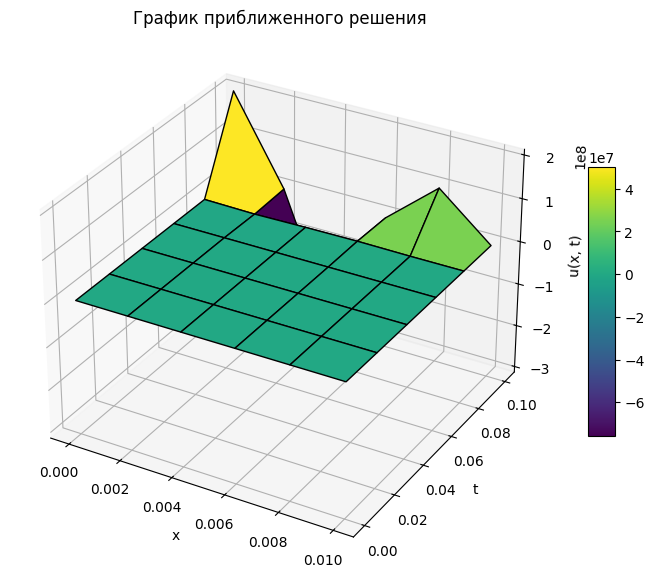

In [24]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

X, T = np.meshgrid(x_grid, t_grid)

Y = y.T

surf = ax.plot_surface(X, T, Y, cmap='viridis', edgecolor='k')

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x, t)')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.title('График приближенного решения')
plt.show()

В данном в случае, как можно видеть, разностная схема также получается неустойчивой.

В итоге, несмотря на то, что по методу разделения переменных разностная схема оказалась устойчивой, практически можно увидеть, что схема является неустойчивой для любых $h$ и $\tau$.